<h1>Regresion lineal</h1>
<h4>Información técnica y de mercado de automóviles</h4>
<h6>Grupo:46</h6>
Importar datos y librerias 


In [12]:
# Llamar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ruta donde se encuentran los archivos
ruta = r'D:\Ingenieria en Sistemas\5. Quinto Semestre\Analisis de datos\Tarea 3\Anexo 2 - Dataset Vehicle'
# Lista todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta) if archivo.endswith('.csv')]

# Mostrar los nombres de los archivos encontrados
print("Archivos CSV encontrados:")
for archivo in archivos_csv:
    print(archivo)

# Cargar los datos de los archivos CSV
dfs = []
for archivo in archivos_csv:
    ruta_archivo = os.path.join(ruta, archivo)
    df = pd.read_csv(ruta_archivo)
    dfs.append(df)

# Mostrar las primeras filas de cada DataFrame
for i, df in enumerate(dfs):
    print(f"\nPrimeras filas de {archivos_csv[i]}:")
    print(df.head())



Archivos CSV encontrados:
car data.csv
CAR DETAILS FROM CAR DEKHO.csv
Car details v3.csv
car details v4.csv

Primeras filas de car data.csv:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Primeras filas de CAR DETAILS FROM CAR DEKHO.csv:
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R

<h4>Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables</h4>
Se utilizan los graficos de dispersion para distribuir las variables numericas y la relacion entre ellas 


Análisis exploratorio de car data.csv:
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


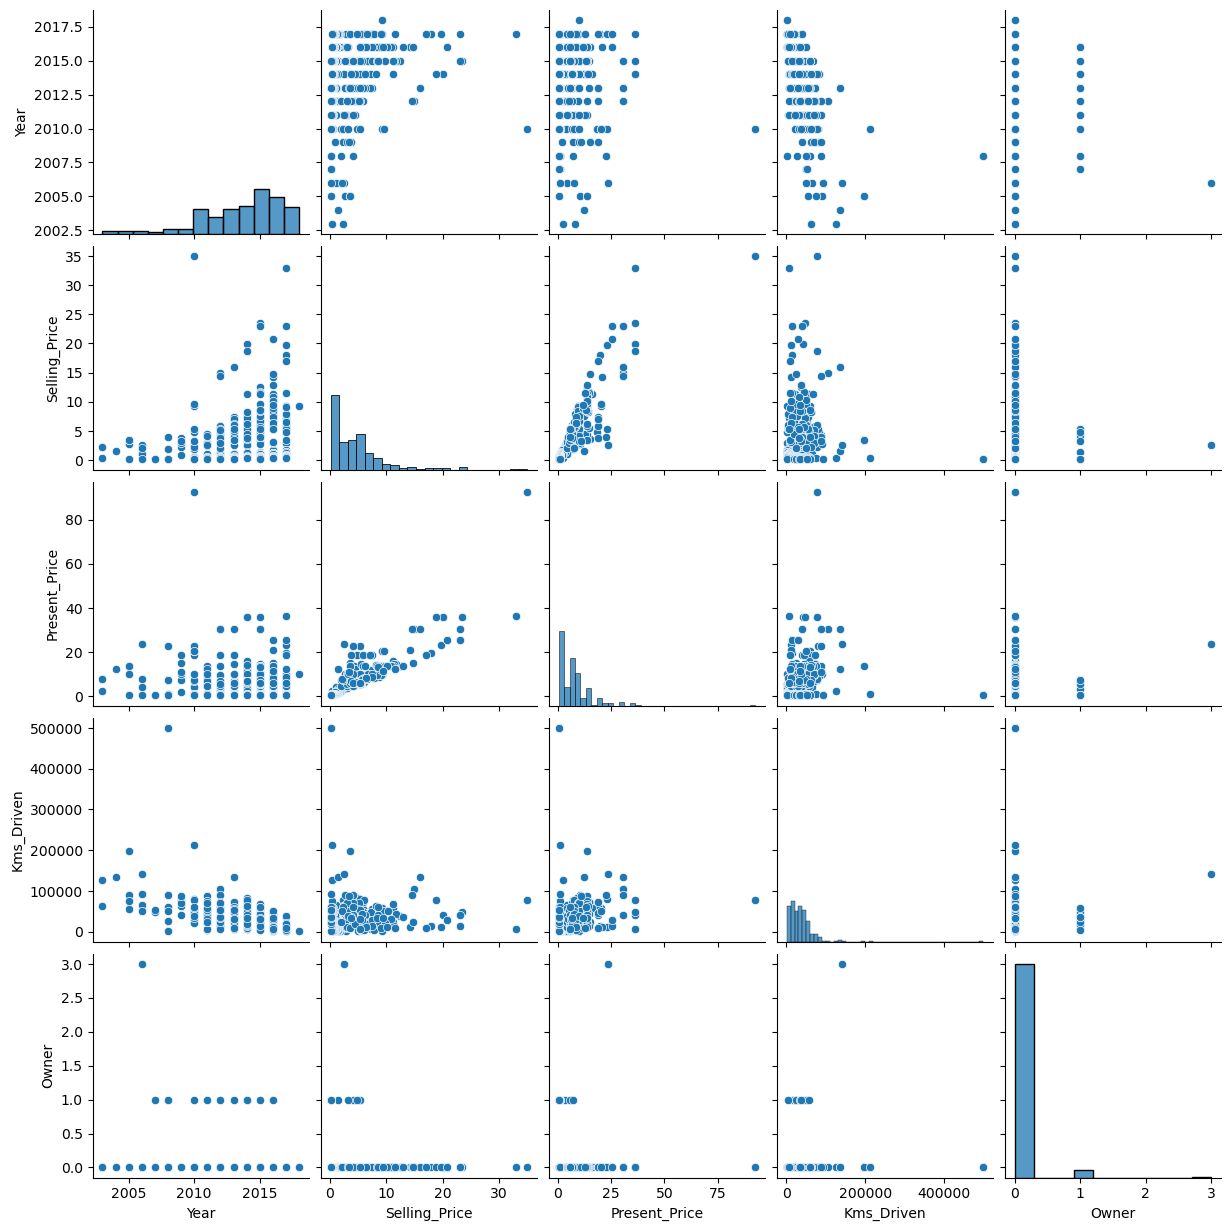


Análisis exploratorio de CAR DETAILS FROM CAR DEKHO.csv:
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


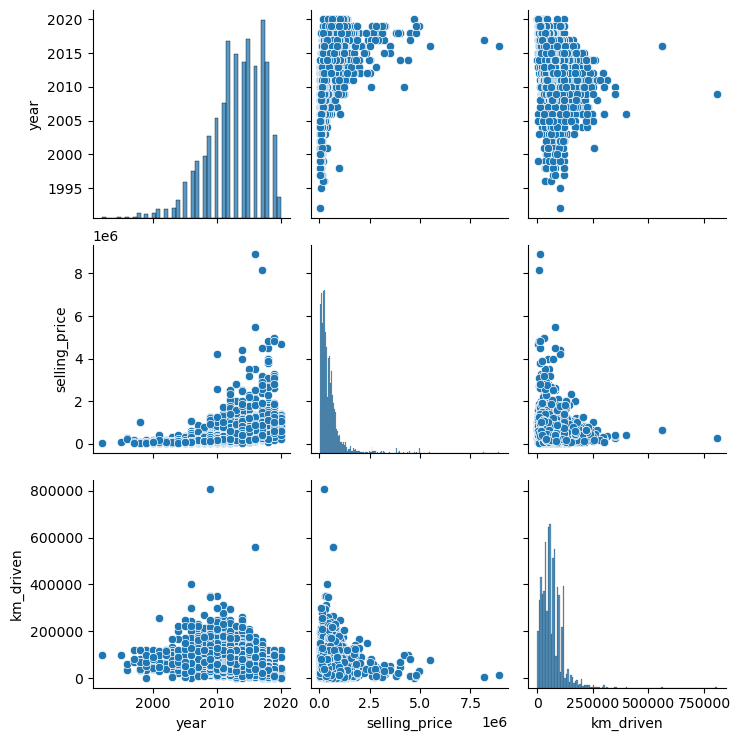


Análisis exploratorio de Car details v3.csv:
              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


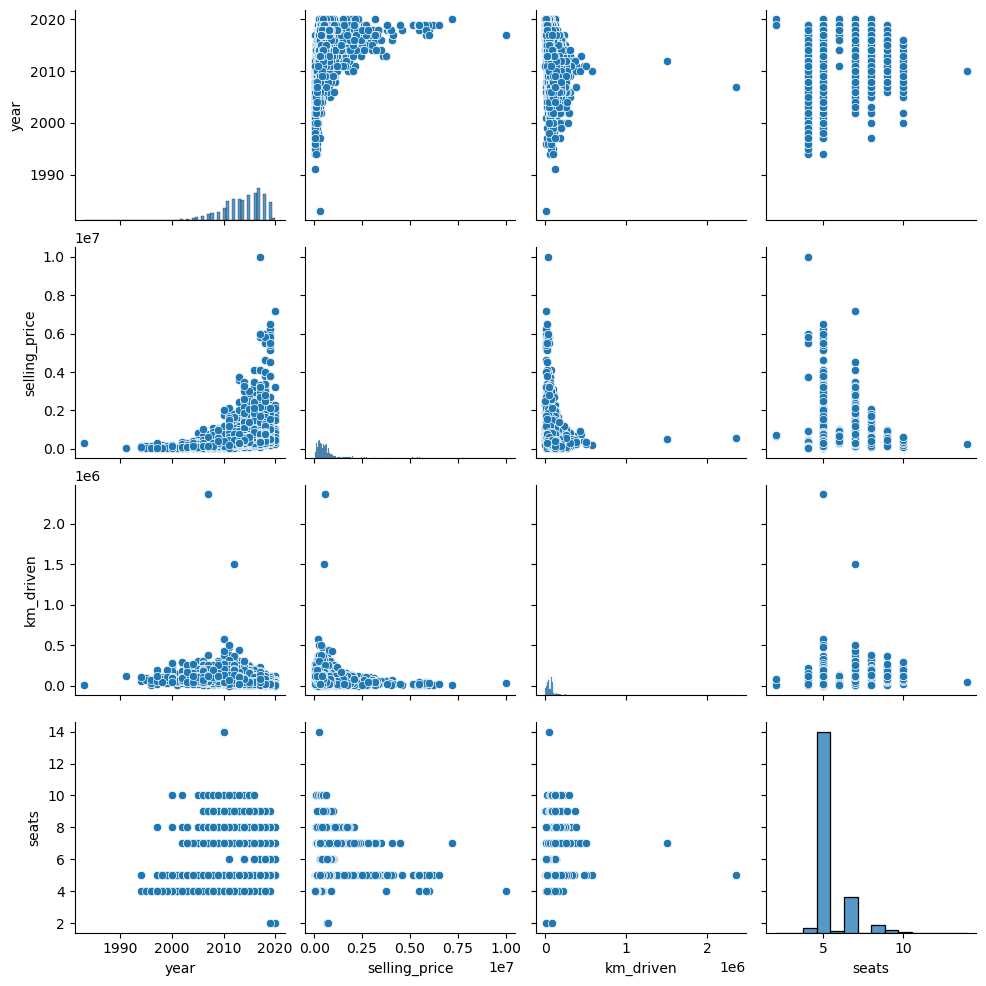


Análisis exploratorio de car details v4.csv:
              Price         Year     Kilometer       Length        Width  \
count  2.059000e+03  2059.000000  2.059000e+03  1995.000000  1995.000000   
mean   1.702992e+06  2016.425449  5.422471e+04  4280.860652  1767.991980   
std    2.419881e+06     3.363564  5.736172e+04   442.458507   135.265825   
min    4.900000e+04  1988.000000  0.000000e+00  3099.000000  1475.000000   
25%    4.849990e+05  2014.000000  2.900000e+04  3985.000000  1695.000000   
50%    8.250000e+05  2017.000000  5.000000e+04  4370.000000  1770.000000   
75%    1.925000e+06  2019.000000  7.200000e+04  4629.000000  1831.500000   
max    3.500000e+07  2022.000000  2.000000e+06  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  1995.000000       1995.000000         1946.000000  
mean   1591.735338          5.306266           52.002210  
std     136.073956          0.822170           15.110198  
min    1165.000000          2.000

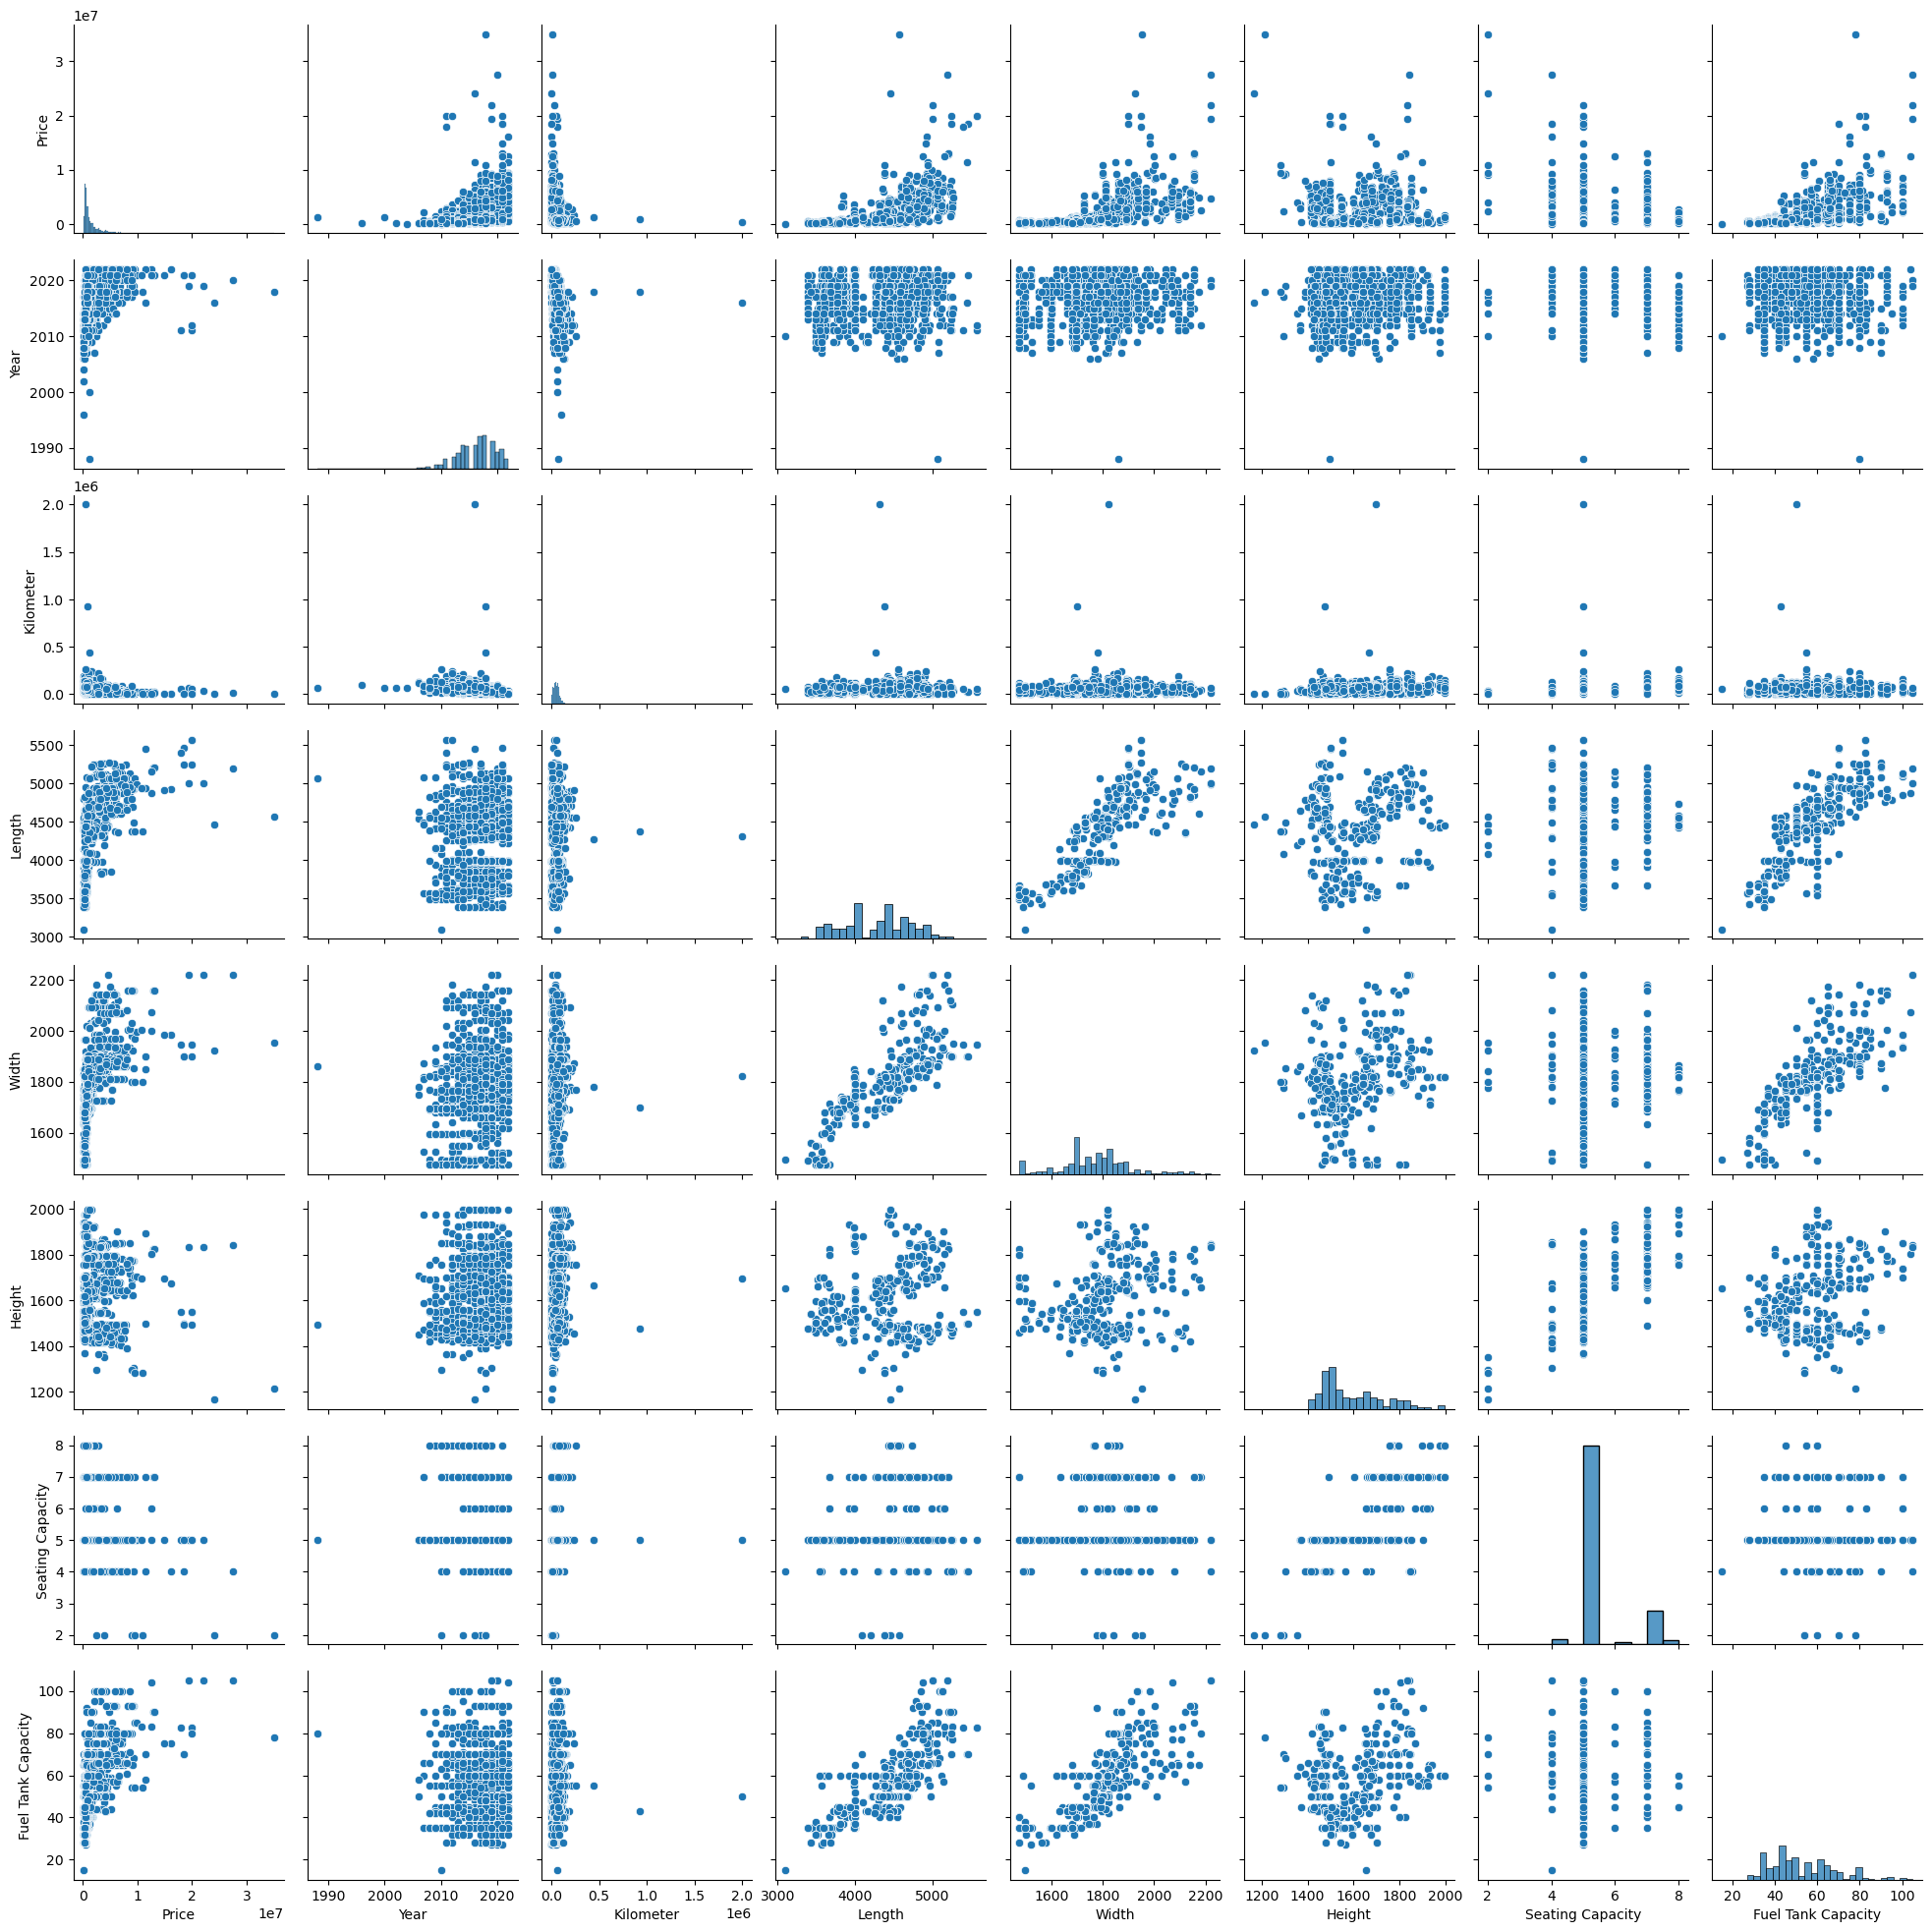

In [13]:
# Importar el módulo warnings
import warnings

# Cargar los datos de los archivos CSV
dfs = []
for archivo in archivos_csv:
    ruta_archivo = os.path.join(ruta, archivo)
    df = pd.read_csv(ruta_archivo)
    dfs.append(df)

# Convertir valores infinitos a NaN en cada DataFrame
for df in dfs:
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Función para trazar una matriz de diagramas de dispersión para identificar relaciones entre variables
def plot_scatter_matrix(data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)  # Ignorar FutureWarnings
        sns.pairplot(data)
    plt.show()

# Explorar la relación entre variables en cada conjunto de datos
for i, df in enumerate(dfs):
    print(f"\nAnálisis exploratorio de {archivos_csv[i]}:")
    print(df.describe())  # Resumen estadístico
    plot_scatter_matrix(df)  # Matriz de diagramas de dispersióna

<h4>Procesar valores atipicos y valores faltantes</h4>
Para tener resultados mas limpios a los valores faltantes se los convierte en datos nulos.

In [14]:
# Directorio donde se encuentran los archivos
directorio = r'D:\Ingenieria en Sistemas\5. Quinto Semestre\Analisis de datos\Tarea 3\Anexo 2 - Dataset Vehicle'
# Lista de archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Tratamiento de valores faltantes en cada archivo
for archivo in archivos_csv:
    ruta_archivo = os.path.join(directorio, archivo)
    print(f"\nTratamiento de valores atípicos y faltantes en {archivo}:")
    
    # Leer el archivo CSV
    df = pd.read_csv(ruta_archivo)
    
    # Reemplazar celdas en blanco o vacías con NaN
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    
    # Guardar el DataFrame modificado en el mismo archivo CSV
    df.to_csv(ruta_archivo, index=False)
    
    print("Valores faltantes tratados y guardados en el archivo.")


Tratamiento de valores atípicos y faltantes en car data.csv:
Valores faltantes tratados y guardados en el archivo.

Tratamiento de valores atípicos y faltantes en CAR DETAILS FROM CAR DEKHO.csv:
Valores faltantes tratados y guardados en el archivo.

Tratamiento de valores atípicos y faltantes en Car details v3.csv:
Valores faltantes tratados y guardados en el archivo.

Tratamiento de valores atípicos y faltantes en car details v4.csv:
Valores faltantes tratados y guardados en el archivo.


In [12]:
import pandas as pd

# Lista de rutas de los archivos CSV modificados
rutas_archivos_modificados = [
    r'D:\Ingenieria en Sistemas\5. Quinto Semestre\Analisis de datos\Tarea 3\Anexo 2 - Dataset Vehicle\car data.csv',
    r'D:\Ingenieria en Sistemas\5. Quinto Semestre\Analisis de datos\Tarea 3\Anexo 2 - Dataset Vehicle\CAR DETAILS FROM CAR DEKHO.csv',
    r'D:\Ingenieria en Sistemas\5. Quinto Semestre\Analisis de datos\Tarea 3\Anexo 2 - Dataset Vehicle\Car details v3.csv',
    r'D:\Ingenieria en Sistemas\5. Quinto Semestre\Analisis de datos\Tarea 3\Anexo 2 - Dataset Vehicle\car details v4.csv'
]

# Para cada archivo modificado, cargamos en un DataFrame y verificamos los cambios
for ruta_archivo_modificado in rutas_archivos_modificados:
    print(f"\nArchivo: {ruta_archivo_modificado}")
    
    # Cargar el archivo CSV modificado en un DataFrame
    df_modificado = pd.read_csv(ruta_archivo_modificado)
    
    # Visualizar las primeras filas del DataFrame
    print("\nPrimeras filas del DataFrame:")
    print(df_modificado.head())
    
    # Verificar si hay valores NaN en el DataFrame
    print("\nValores NaN en el DataFrame:")
    print(df_modificado.isna().any())
    
    # Contar valores NaN en cada columna
    print("\nConteo de valores NaN en cada columna:")
    print(df_modificado.isna().sum())


Archivo: D:\Ingenieria en Sistemas\5. Quinto Semestre\Analisis de datos\Tarea 3\Anexo 2 - Dataset Vehicle\car data.csv

Primeras filas del DataFrame:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Valores NaN en el DataFrame:
Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmiss

<h1>Seleccionar las características más relevantes para entrenar el modelo</h1>
Debido a que el precio de venta es un variable objetivo se utiliza un archivo el cual tenga esta variable en este caso es car data.csv

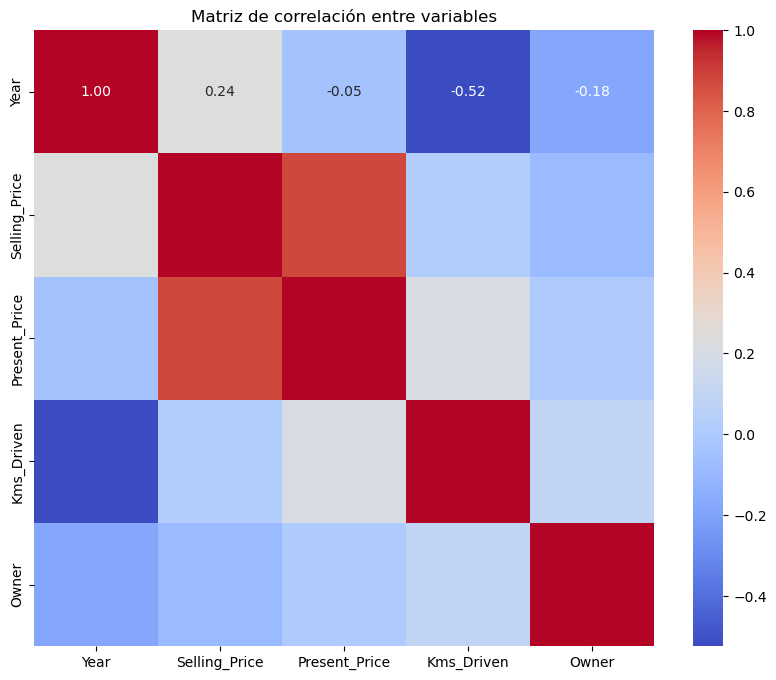

In [15]:
# Cargar el archivo CSV modificado en un DataFrame
archivo_csv = r'D:\Ingenieria en Sistemas\5. Quinto Semestre\Analisis de datos\Tarea 3\Anexo 2 - Dataset Vehicle\car data.csv'
df = pd.read_csv(archivo_csv)

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de correlación entre variables')
plt.show()

<h1>Dividir el dataset en Train y Test para evaluar correctamente el 
modelo</h1>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ruta donde se encuentra el archivo car-data.csv
ruta = r"D:\Ingenieria en Sistemas\5. Quinto Semestre\Analisis de datos\Tarea 3\Anexo 2 - Dataset Vehicle"

# Cargar el archivo car-data.csv
car_data = pd.read_csv(ruta + r"\car data.csv")

# Normalizar los nombres de las columnas
car_data.columns = car_data.columns.str.lower()

# Seleccionar solo las columnas relevantes para el análisis de correlación y el entrenamiento del modelo
train_data = car_data[['selling_price', 'year', 'present_price', 'kms_driven']]

# Calcular la matriz de correlación
correlation_matrix = train_data.corr()

# Seleccionar las características más importantes basadas en la matriz de correlación
important_features = ['year', 'present_price', 'kms_driven']

# Definir las características (variables independientes) y la variable objetivo (variable dependiente) usando las características más importantes
X_train = train_data[important_features]
y_train = train_data['selling_price']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los precios de venta en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)

Error cuadrático medio (MSE) en el conjunto de prueba: 4.010554030280747


Un MSE de 4.010554030280745 indica que el modelo tiene un rendimiento moderado en el conjunto de prueba, pero aún hay margen de mejora para reducir el error de predicción.
<h1>Graficas</h1>
<h4>Predicciones vs Valores reales</h4>

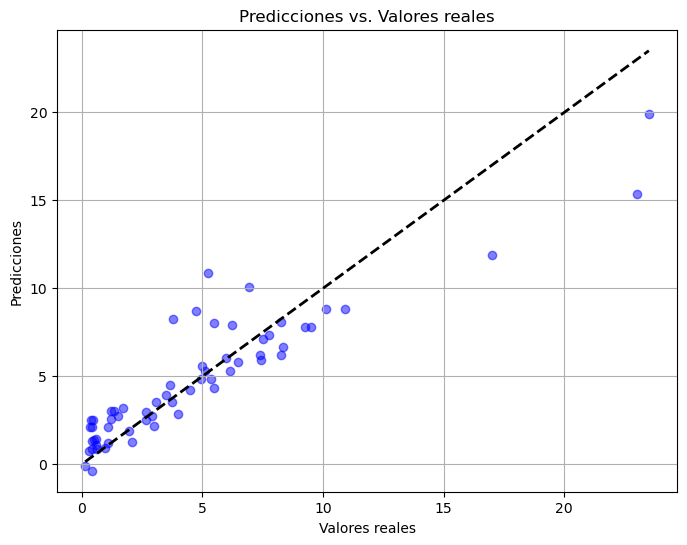

In [20]:
import matplotlib.pyplot as plt

# Diagrama de dispersión de predicciones vs. valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.grid(True)
plt.show()


<h5>Analisis</h5>
Esta visualización presenta la relación entre las predicciones realizadas por el modelo y los valores reales. Cada punto en el gráfico representa un valor real junto con su correspondiente predicción. La línea diagonal en el gráfico representa la situación ideal en la que todas las predicciones coinciden exactamente con los valores reales.

Al observar la distribución de los puntos, podemos notar que la mayoría de ellos se encuentran cerca de la parte inferior de la línea diagonal. Esto sugiere que el modelo de predicción tiene un rendimiento generalmente bueno, ya que las predicciones están cercanas a los valores reales. Sin embargo, también es evidente que algunos puntos se encuentran alejados de la línea diagonal, especialmente en valores altos. Esto indica que el modelo podría mejorar en la precisión de sus predicciones para estos casos específico

<h4>Valores reales vs Predicciones</h4>s.

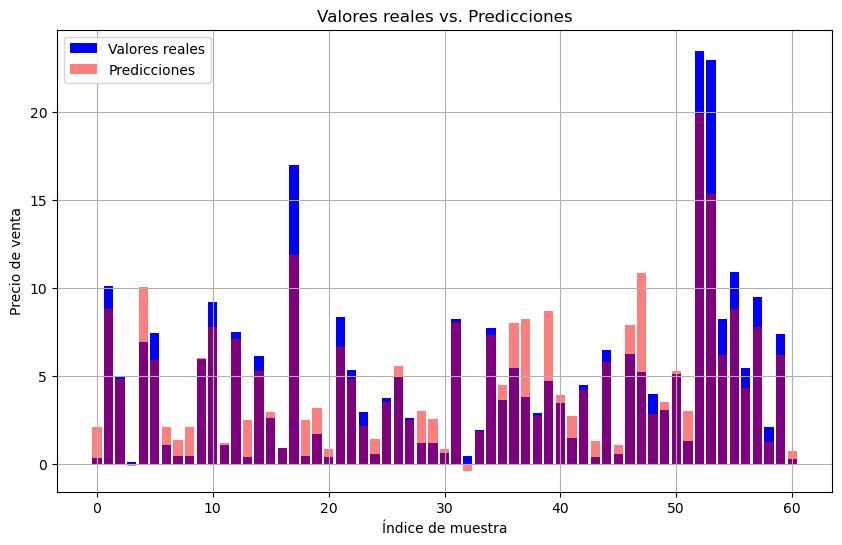

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Crear índice para las muestras
indices = np.arange(len(y_test))

# Gráfico de barras de valores reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.bar(indices, y_test, color='blue', label='Valores reales')
plt.bar(indices, y_pred, color='red', alpha=0.5, label='Predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Precio de venta')
plt.title('Valores reales vs. Predicciones')
plt.legend()
plt.grid(True)
plt.show()


<h5>Analisis</h5>

La representación visual ilustra la discrepancia entre los valores reales y las predicciones generadas por un modelo de predicción aplicado a automóviles. Los valores reales se muestran en tono azul, mientras que las predicciones se exhiben en rojo. En el eje horizontal se ubica el índice de la muestra, mientras que en el eje vertical se evidencia la discrepancia entre los valores reales y las predicciones, medida en unidades monetarias de precio de venta.

En términos generales, el gráfico revela que en ciertos índices, los valores reales superan a las predicciones del modelo, y en otros casos ocurre lo contrario. Esto sugiere que el modelo de predicción produce estimaciones coherentes y con un margen de error relativamente reducido en términos generales.

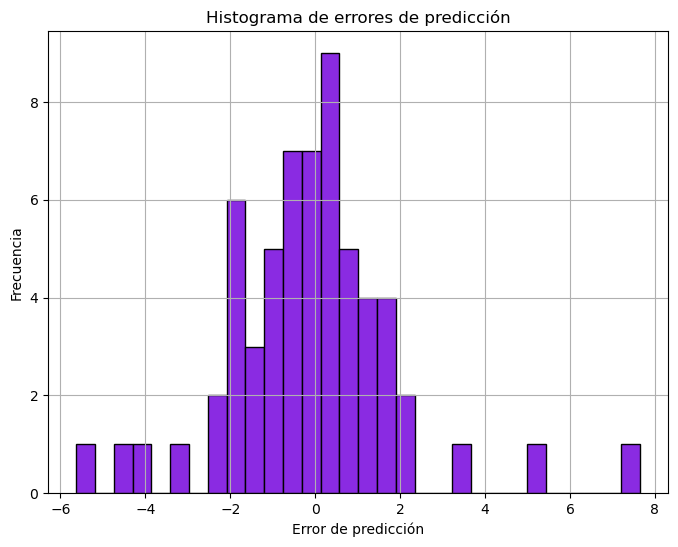

In [23]:
# Histograma de errores
errores = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(errores, bins=30, color='blueviolet', edgecolor='black')
plt.xlabel('Error de predicción')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores de predicción')
plt.grid(True)
plt.show()

<h5>Analisis</h5>
La forma del histograma puede proporcionar valiosa información sobre el desempeño del modelo de regresión lineal. En este caso, el histograma exhibe una distribución con una forma de campana, lo cual es considerado un indicador positivo.

El ancho del histograma puede ser indicativo del rendimiento del modelo. Un histograma estrecho, como el presente, sugiere que los errores son mínimos, lo que implica que el modelo está generando predicciones precisas.

Aunque el histograma muestra cierta amplitud, con barras de menor altura a ambos lados, se puede concluir que los resultados obtenidos del entrenamiento son satisfactorios y que la distribución de los errores se ajusta a una distribución normal.

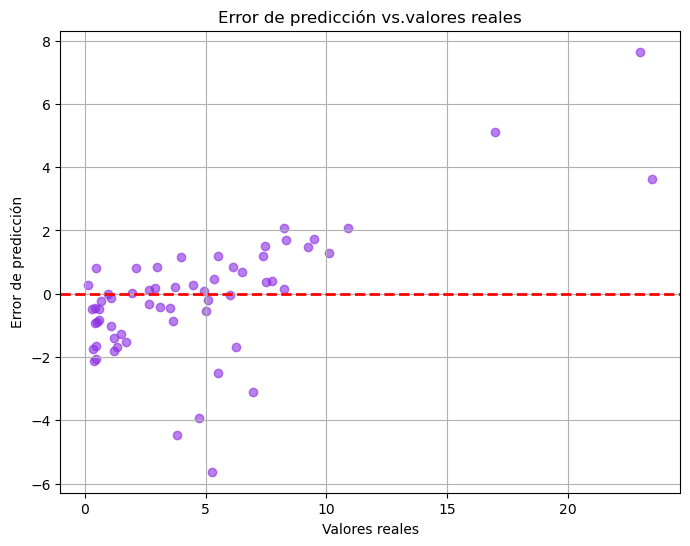

In [24]:
# Gráfico de dispersión de errores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errores, color='blueviolet', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Error de predicción')
plt.title('Error de predicción vs.valores reales')
plt.grid(True)
plt.show()

<h5>Analisis</h5>
La representación gráfica revela que el error de predicción es bastante reducido para los automóviles con precios más bajos. No obstante, se observa un incremento en el error de predicción a medida que aumentan los valores reales. Este patrón indica que el modelo de regresión lineal tiene una precisión relativamente menor al predecir valores más altos de la variable dependiente. Estos hallazgos refuerzan y confirman las conclusiones extraídas de las visualizaciones previas.
<h5>Conclusiones</h5>
El modelo de predicción exhibe un desempeño satisfactorio en general, demostrando una capacidad considerable para predecir los valores de la variable dependiente. Sin embargo, se observan algunos puntos dispersos que se desvían significativamente de la tendencia general, lo que sugiere la presencia de ciertos errores en las predicciones. Estos puntos atípicos podrían ser abordados mediante un proceso de entrenamiento adicional, que permita al modelo ajustarse mejor a los datos y mejorar su precisión predictiva en áreas específicas.
